<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter03/Policy_Evaluation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
class Gridworld:
  def __init__(self, size=9, start=4, goals=[0, 1]):
    self.size = size
    self.start = start
    self.goals = goals
    self.states = [x for x in range(size)]
    self.actions = [-1, 1]
    self.policy = {}  # Policy should be defined later
    self.value = {}
    for s in self.states:
      self.value[s] = 0
   
  def move(self, s, a):
    if s in self.goals:
      r = 0
      return s, r
    
    if s + a not in self.states:
      r = 0
      return s, r
    
    if s + a in self.goals:
      s = s + a
      r = 1
      return s, r
    
    s = s + a
    r = 0
    return s, r
  
  def show_value(self):
    result = np.zeros([1, self.size])
    for s in self.states:
      result[0][s]  = self.value[s]
    sns.heatmap(result, square=True, cbar=False, yticklabels=[],
                annot=True, fmt='3.1f', cmap='coolwarm')

In [0]:
def policy_eval(world, gamma=1.0, trace=True):
  for s in world.states:
    v_new = 0
    for a in world.actions:
      s_new, r = world.move(s, a)
      v_new += world.policy[(s, a)] * (r + gamma * world.value[s_new])
    world.value[s] = v_new
    if trace:
      fig = plt.figure(figsize=(7, 7))
      subplot = fig.add_subplot(world.size, 1, s+1)
      world.show_value()

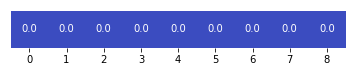

In [4]:
world = Gridworld(start=9, goals=[0])
for s in world.states:
  world.policy[(s, -1)] = 1
  world.policy[(s, 1)] = 0

world.show_value()

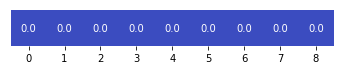

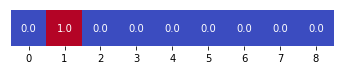

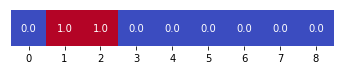

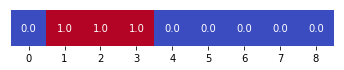

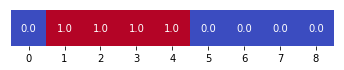

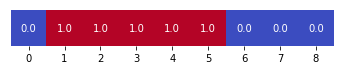

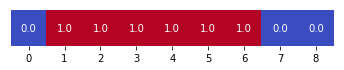

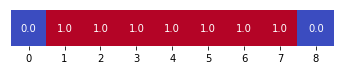

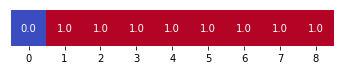

In [5]:
policy_eval(world)

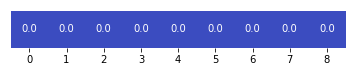

In [6]:
world = Gridworld(start=4, goals=[0, 8])
for s in world.states:
  world.policy[(s, -1)] = 1/2
  world.policy[(s, 1)] = 1/2

world.show_value()

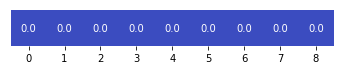

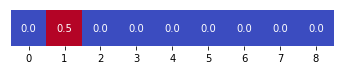

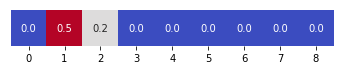

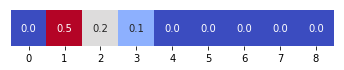

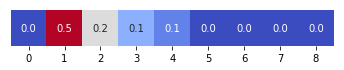

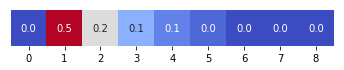

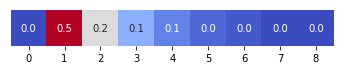

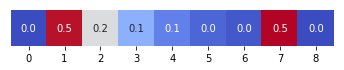

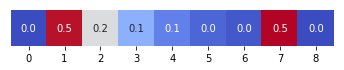

In [7]:
policy_eval(world)

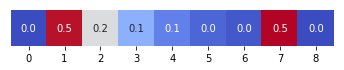

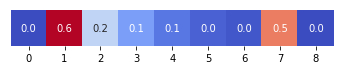

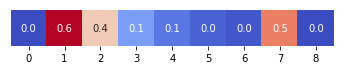

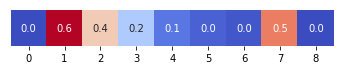

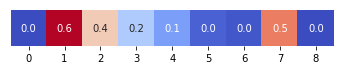

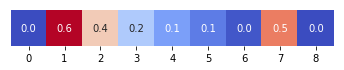

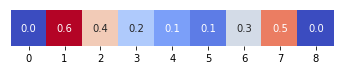

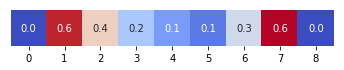

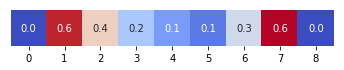

In [8]:
policy_eval(world)

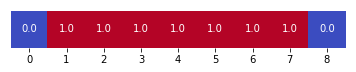

In [9]:
for _ in range(100):
  policy_eval(world, trace=False)
world.show_value()